Hotel verilerinin analiz edilerek makine ogrenmesi metodlari ile egitilmesi

Pythonda calistirilacak kutuphanelerin yuklenmesi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Hotel verisinin okunmasi

In [2]:
hotel = pd.read_excel('hotel.xlsx')

Verideki degerlere ait ozet bilgiler

In [3]:
hotel.describe()

,hotel_id,booking_no,name,rooms,total_amount,required_prepayment,repaid_amount,payment_method,cancellation_date,night,status,extra_services,customer,gender,guests,special_offer,agent_rate_plan,discounts
count,20166.0,20166.000000,0.0,20166.000000,20166.000000,0.0,0.0,0.0,0.0,20166.000000,0.0,0.0,0.0,0.0,20166.000000,0.0,0.0,0.0
mean,3.0,267828.103689,NaN,1.075573,500.577349,NaN,NaN,NaN,NaN,3.590102,NaN,NaN,NaN,NaN,1.744322,NaN,NaN,NaN
std,0.0,13104.568221,NaN,1.354073,1682.625128,NaN,NaN,NaN,NaN,2.898188,NaN,NaN,NaN,NaN,0.600344,NaN,NaN,NaN
min,3.0,247089.000000,NaN,1.000000,2.268769,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,3.0,256602.250000,NaN,1.000000,132.377501,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,3.0,266209.000000,NaN,1.000000,280.335000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,3.0,278545.750000,NaN,1.000000,633.600000,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
max,3.0,293481.000000,NaN,80.000000,211500.000000,NaN,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN


Verilere ait deger sayisi ve data tipleri

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hotel_id                20166 non-null  int64         
 1   booking_no              20166 non-null  int64         
 2   name                    0 non-null      float64       
 3   rooms                   20166 non-null  int64         
 4   total_amount            20166 non-null  float64       
 5   required_prepayment     0 non-null      float64       
 6   repaid_amount           0 non-null      float64       
 7   payment_method          0 non-null      float64       
 8   booking_date            20166 non-null  datetime64[ns]
 9   cancellation_date       0 non-null      float64       
 10  arrival_date            20166 non-null  datetime64[ns]
 11  night                   20166 non-null  int64         
 12  departure_date          20166 non-null  dateti

Bos olan degerlerin cikarilmasi

In [5]:
hotel.dropna(inplace=True, axis=1)

Ilk 5 degerin gosterilmesi

In [6]:
hotel.head()

,hotel_id,booking_no,rooms,total_amount,booking_date,arrival_date,night,departure_date,reference_source,accommodation_property,room_type,guests
0,3,247303,1,112.626298,2022-06-06,2022-06-11,1,2022-06-12,TOUROPRTL,Megasaray Westbeach,Deluxe Standart Deniz Manzaralı,2
1,3,247304,1,86.722249,2022-06-06,2022-06-11,1,2022-06-12,TOUROPRTL,Megasaray Westbeach,Deluxe Standart Deniz Manzaralı,1
2,3,247740,1,311.072007,2022-06-12,2022-06-12,4,2022-06-16,TOUROPRTL,Megasaray Westbeach,Deluxe Standart Deniz Manzaralı,1
3,3,248203,1,714.000000,2022-06-17,2022-06-20,4,2022-06-24,TOUROPRBDT,Megasaray Westbeach,Aile Odası,3
4,3,247875,1,753.300000,2022-06-13,2022-06-13,4,2022-06-17,TOUROPRORT,Megasaray Westbeach,Comfort Standart Oda - Deniz Manzaralı,3


Numerik degerlerin ikili iliskisine goz atma

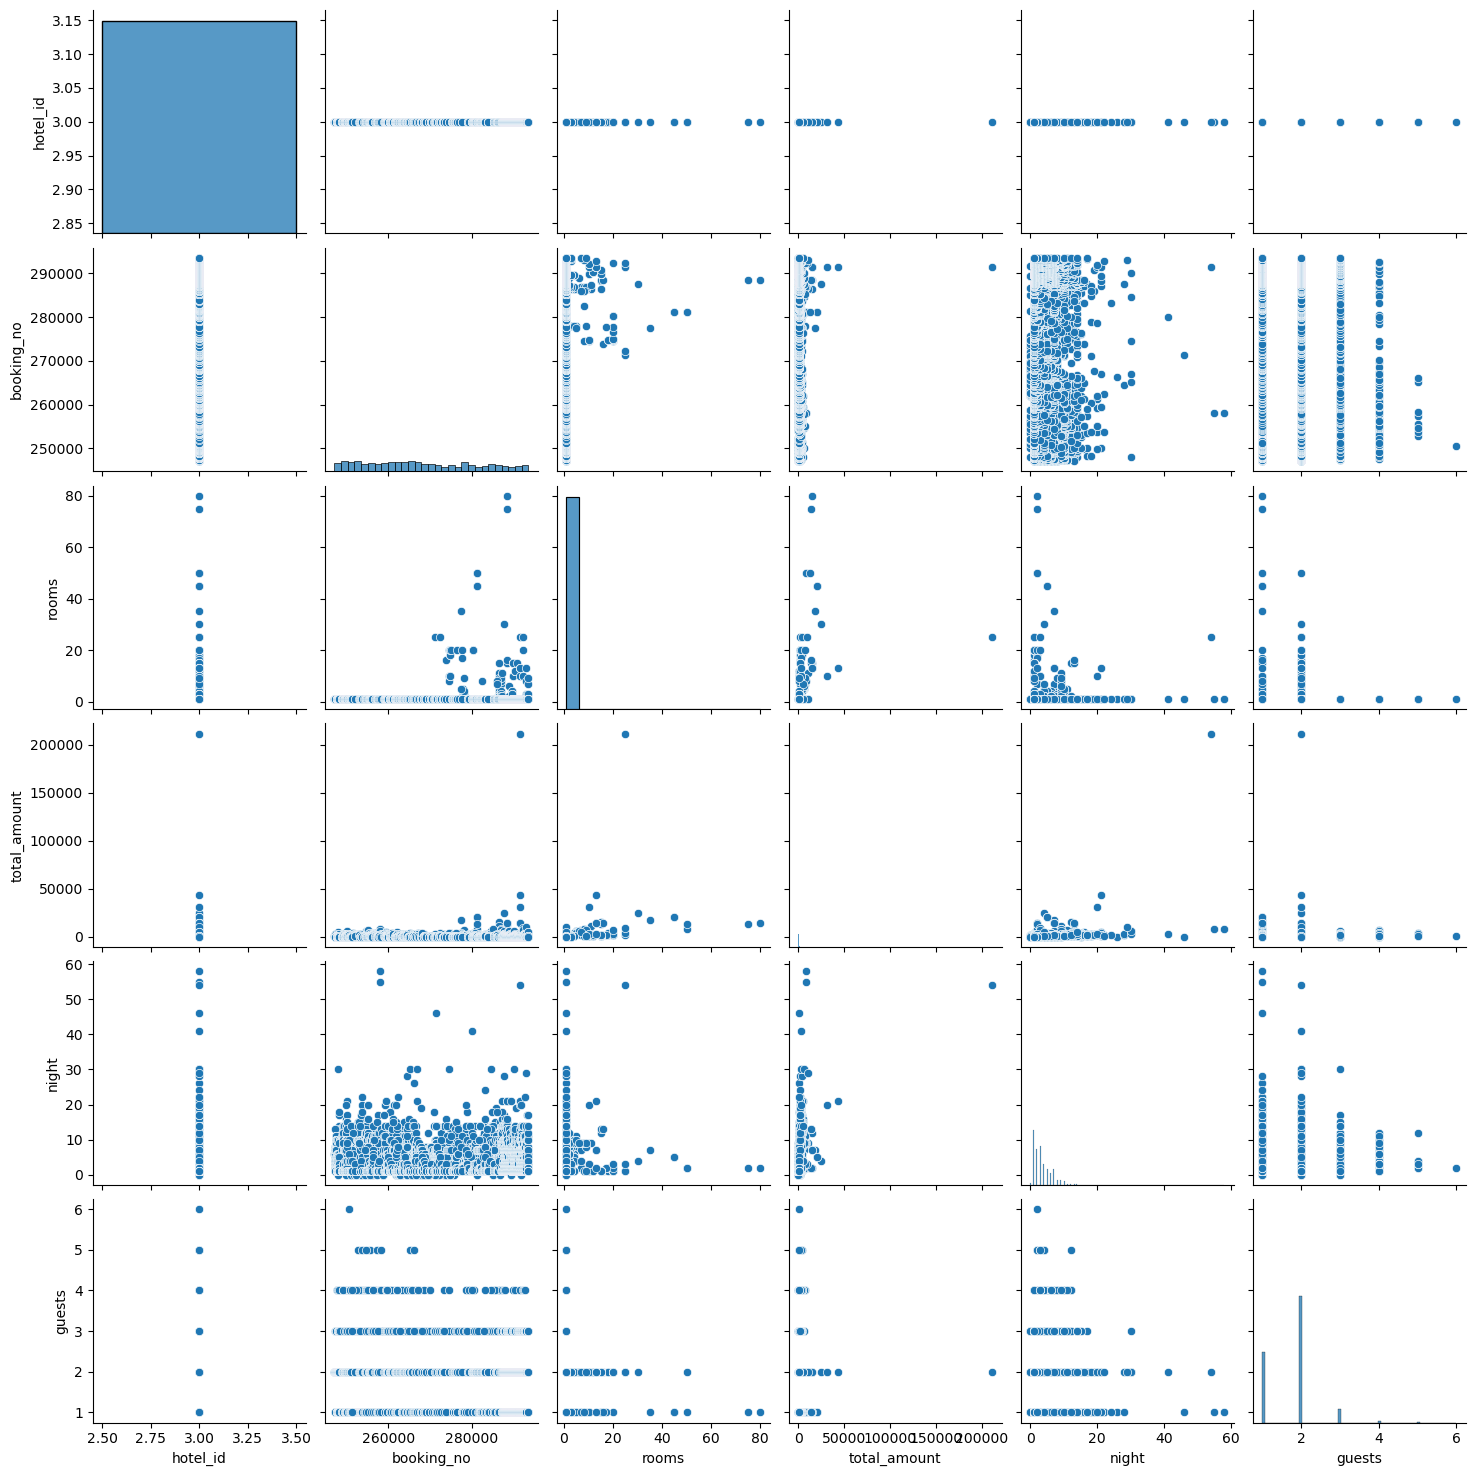

In [7]:
sns.pairplot(hotel)

Verinin ait degerlerin sayisi ve veri tiplerine tekrar bakis

In [8]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hotel_id                20166 non-null  int64         
 1   booking_no              20166 non-null  int64         
 2   rooms                   20166 non-null  int64         
 3   total_amount            20166 non-null  float64       
 4   booking_date            20166 non-null  datetime64[ns]
 5   arrival_date            20166 non-null  datetime64[ns]
 6   night                   20166 non-null  int64         
 7   departure_date          20166 non-null  datetime64[ns]
 8   reference_source        20166 non-null  object        
 9   accommodation_property  20166 non-null  object        
 10  room_type               20166 non-null  object        
 11  guests                  20166 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(5), ob

Analizde kullanilmayacak verilerin cikarilmasi

In [9]:
hotel.drop('booking_no',axis=1,inplace=True)

In [10]:
hotel.drop('accommodation_property', axis=1, inplace=True)

In [11]:
hotel.drop('hotel_id', axis=1, inplace=True)

Rooms degerlerinin neler oldugu ve kac kere tekrarlandigi

In [12]:
hotel['rooms'].value_counts()

1     19998
2        39
3        20
20       16
4        15
15       10
5        10
7         9
10        9
8         7
13        4
9         4
25        4
12        4
50        2
45        2
18        2
11        2
16        2
6         2
35        1
17        1
80        1
75        1
30        1
Name: rooms, dtype: int64

Rooms degerlerinin de cikarilmasi

In [13]:
# rooms column isnt actually telling a thing to us
hotel.drop('rooms',axis=1,inplace=True)

Misafir sayilarinin veri icerisindeki tekrarlama sayisi

In [14]:
hotel['guests'].value_counts()

2    12010
1     6724
3     1306
4      117
5        8
6        1
Name: guests, dtype: int64

Misafir sayilarinin histogramda gosterilmesi
(En cok iki kisilik gruplarin misafir edildigi goze carpiyor. 4 ve uzerindeki gruplar oldukca az.)

<Axes: >

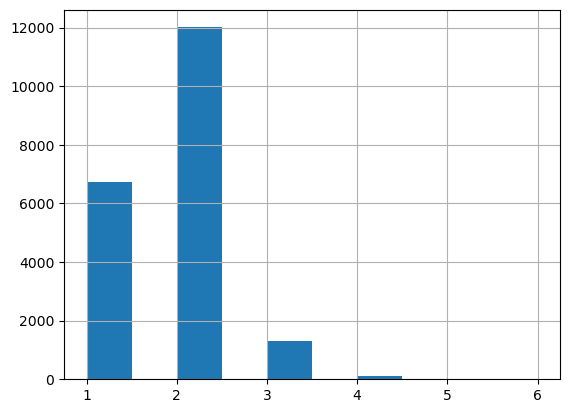

In [15]:
hotel['guests'].hist()

Degerlerin hangi yillara ait olduklari ve sayilari

In [16]:
hotel['booking_year']= hotel['booking_date'].dt.year
hotel['booking_year'].value_counts()

2022    16391
2023     3775
Name: booking_year, dtype: int64

Numerik degerler arasindaki korelasyon
Kalinan gece sayisinin toplam fiyatla olan korelasyonunun fazla oldugu gorulebiliyor.

In [17]:
hotel.corr()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_23000\2851777828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hotel.corr()


,total_amount,night,guests,booking_year
total_amount,1.000000,0.364162,0.081032,0.030891
night,0.364162,1.000000,0.064744,0.006991
guests,0.081032,0.064744,1.000000,-0.055655
booking_year,0.030891,0.006991,-0.055655,1.000000


Kalinan gece sayisi ve tekrarlanma sayilari

In [18]:
hotel['night'].value_counts()

1     5233
3     3665
2     3424
4     1975
7     1483
5     1456
6     1133
8      481
9      420
10     315
0      144
11     110
14     103
12      78
13      57
15      21
20      11
16      10
21       9
17       8
18       8
30       6
22       3
19       3
28       2
46       1
26       1
58       1
55       1
41       1
24       1
54       1
29       1
Name: night, dtype: int64

Kalinan gece sayisi ve toplam ucretin dagilim grafigi

c:\Users\yusuf\anaconda3\envs\datascience\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


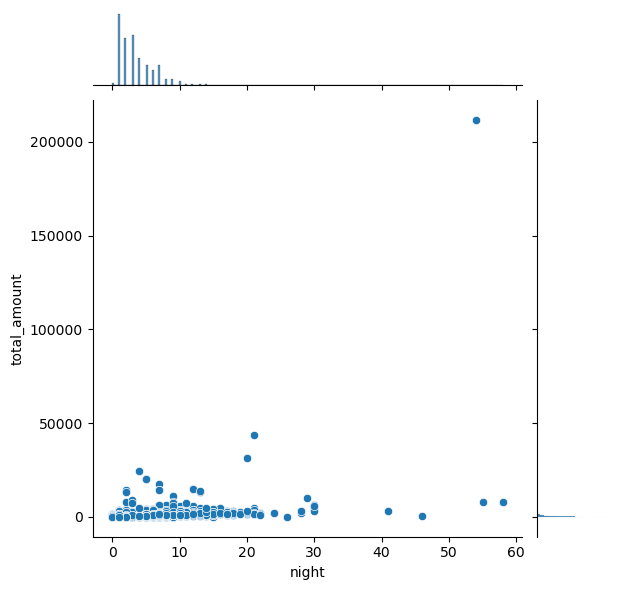

In [19]:
# hotel.plot.scatter('night','total_amount',s=hotel['guests']*10)
sns.jointplot(x='night',y='total_amount',data=hotel,cmap='pastel')

Aylara ait degerlerin histogrami
(4 ve 5. aylara ait veriler yok)

<Axes: >

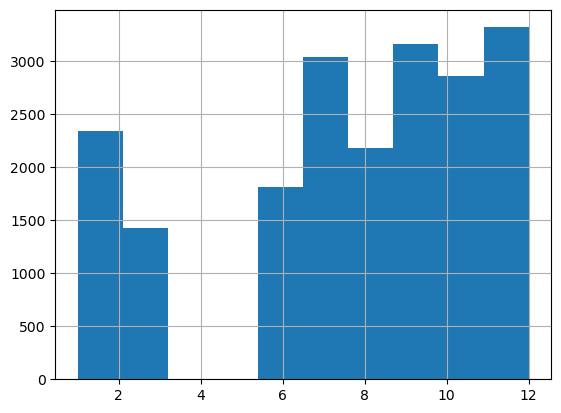

In [20]:
hotel['booking_month']= hotel['booking_date'].dt.month
hotel['booking_month'].hist()

Hangi aylara ait verilerin oldugu

In [21]:
hotel['booking_month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3], dtype=int64)

Hangi yillara ait verilerin oldugu

In [22]:
hotel['booking_year'].unique()

array([2022, 2023], dtype=int64)

Veri sayilarinin ay-yil olarak listelenmesi

In [23]:
hotel['booking_year_month'] = hotel['booking_date'].dt.strftime('%B-%Y')
hotel['booking_year_month'].value_counts()

September-2022    3164
July-2022         3041
October-2022      2860
August-2022       2187
June-2022         1816
November-2022     1755
December-2022     1568
March-2023        1427
February-2023     1346
January-2023      1002
Name: booking_year_month, dtype: int64

Ay-yil degerlerinin histogramda gosterilmesi

<Axes: xlabel='booking_year_month', ylabel='Count'>

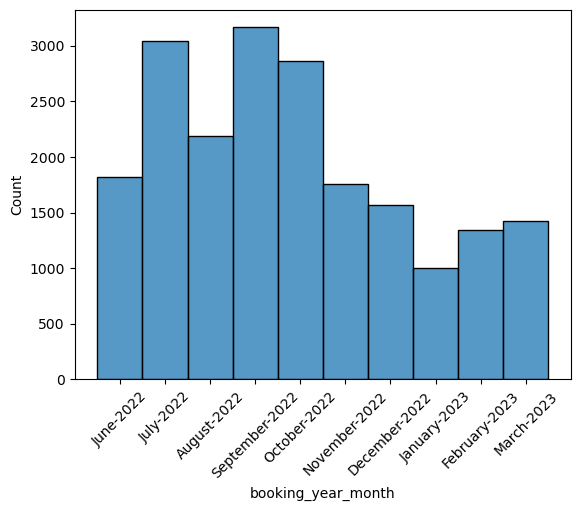

In [24]:
plt.xticks(rotation=45)
sns.histplot(hotel['booking_year_month'])

Rezervasyonlarin hangi vasitalar uzerinden yapildigi

In [25]:
hotel['reference_source'].unique()

array(['TOUROPRTL', 'TOUROPRBDT', 'TOUROPRORT', 'TOUROPBT', 'ONLINE',
       'TOUROPISKV', 'TOUROPOTH', 'TOUROPDA', 'AIRCREW', 'TOUROPGB',
       'MICEINT', 'COMP', 'SIRKET', 'MICELOCAL', 'ACENTE', 'MUNFERIT',
       'AIRLAYOVER', 'WALK-IN'], dtype=object)

Ucretlendirmelere ait dagilim (500 birim altindakiler)
80 ile 200 arasinda degerlerin sayica daha yuksek oldugu goruluyor.

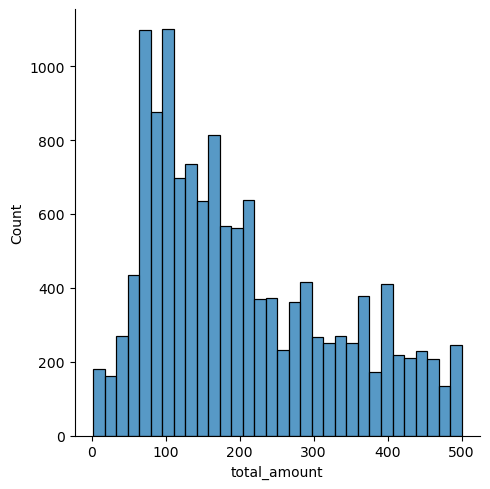

In [26]:
hotel = hotel[hotel['total_amount']<500]
sns.displot(hotel['total_amount'])

Aylik fiyat degerlerinin kutu grafigi. 
Yaz aylarinda orta degerlerin ve fiyat dagiliminin yuksek oldugu gozlemleniyor.

<Axes: xlabel='booking_year_month', ylabel='total_amount'>

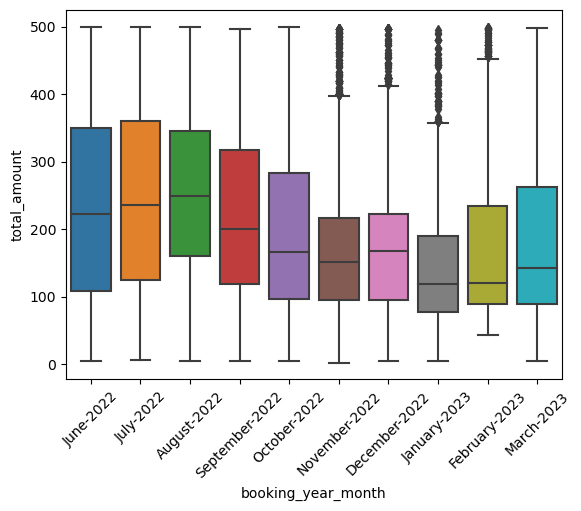

In [27]:
plt.xticks(rotation=45)
sns.boxplot(x='booking_year_month',y='total_amount',data=hotel)

Rezervasyon gunlerinin deger sayilari

In [28]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
hotel['booking_day'] = hotel['booking_date'].dt.day_of_week.map(dayOfWeek)
hotel['booking_day'].value_counts()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_23000\717442063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['booking_day'] = hotel['booking_date'].dt.day_of_week.map(dayOfWeek)


Wednesday    2521
Thursday     2367
Monday       2326
Tuesday      1987
Friday       1967
Saturday     1652
Sunday        947
Name: booking_day, dtype: int64

Rezervasyon gunlerinin kutu grafigi. Sagdaki rakamlar misafir sayini tanimlamaktadir.

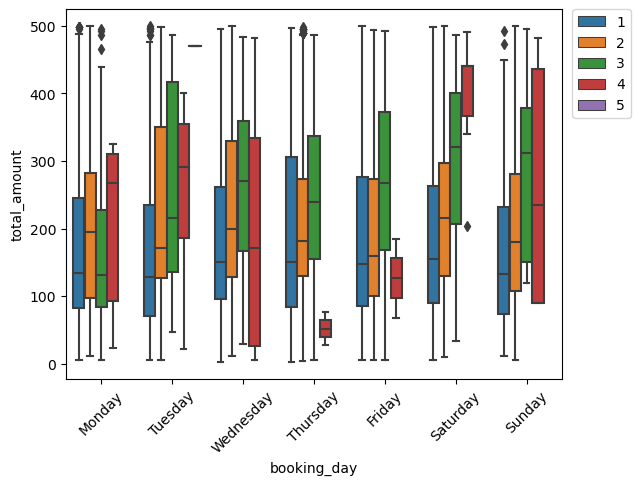

In [29]:
plt.xticks(rotation=45)
sns.boxplot(x='booking_day',y='total_amount',data=hotel,hue='guests',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Referanslarin kutu grafigi.

<Axes: xlabel='reference_source', ylabel='total_amount'>

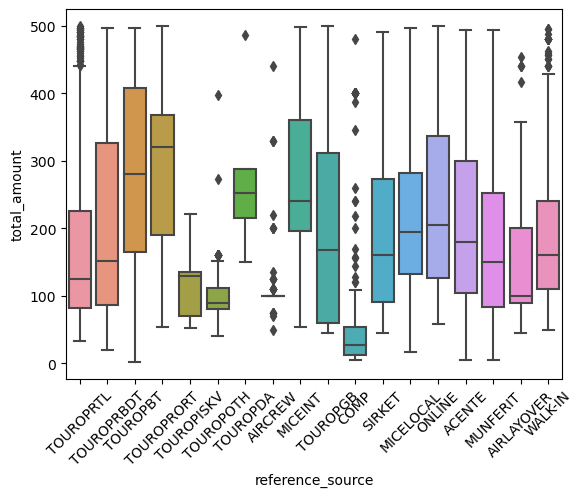

In [30]:
plt.xticks(rotation=45)
sns.boxplot(x='reference_source',y='total_amount',data=hotel)

Ulke verilerinin sayilari

In [52]:
hotel2 = pd.read_excel('hotel.xlsx')
hotel2['country'].value_counts()

TC     6317
RUS    3662
UZB    1046
GBR     739
ISR     627
       ... 
ISL       1
URG       1
TR        1
MOZ       1
KAM       1
Name: country, Length: 108, dtype: int64

Oda tiplerinin aylara gore getirdigi gelir toplamlari

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, 'Not specified'),
  Text(0.0, 0, 'Aile Odası'),
  Text(2.0, 0, 'Comfort Standart Oda- Kara Manzaralı'),
  Text(4.0, 0, 'Deluxe Standart Deniz Manzaralı'),
  Text(6.0, 0, 'Junior Suit'),
  Text(8.0, 0, 'Not specified'),
  Text(10.0, 0, '')])

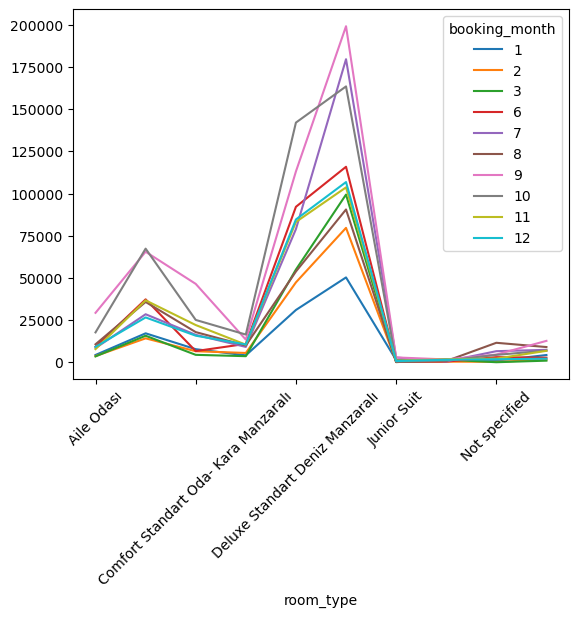

In [31]:
a = pd.pivot_table(hotel,values='total_amount',index='room_type',columns='booking_month',aggfunc=np.sum)
a.plot()
plt.xticks(rotation=45)

In [ ]:
Mevcut veriler kullanilarak kalinan gece ve misafir sayisina gore bir karar agacinin egitilmesi.

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor()

X = hotel[['night','guests']]
y = hotel['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dt.fit(X_train,y_train)
pred = dt.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

88.94744181535397


Karar agacinin cizdirilmesi.

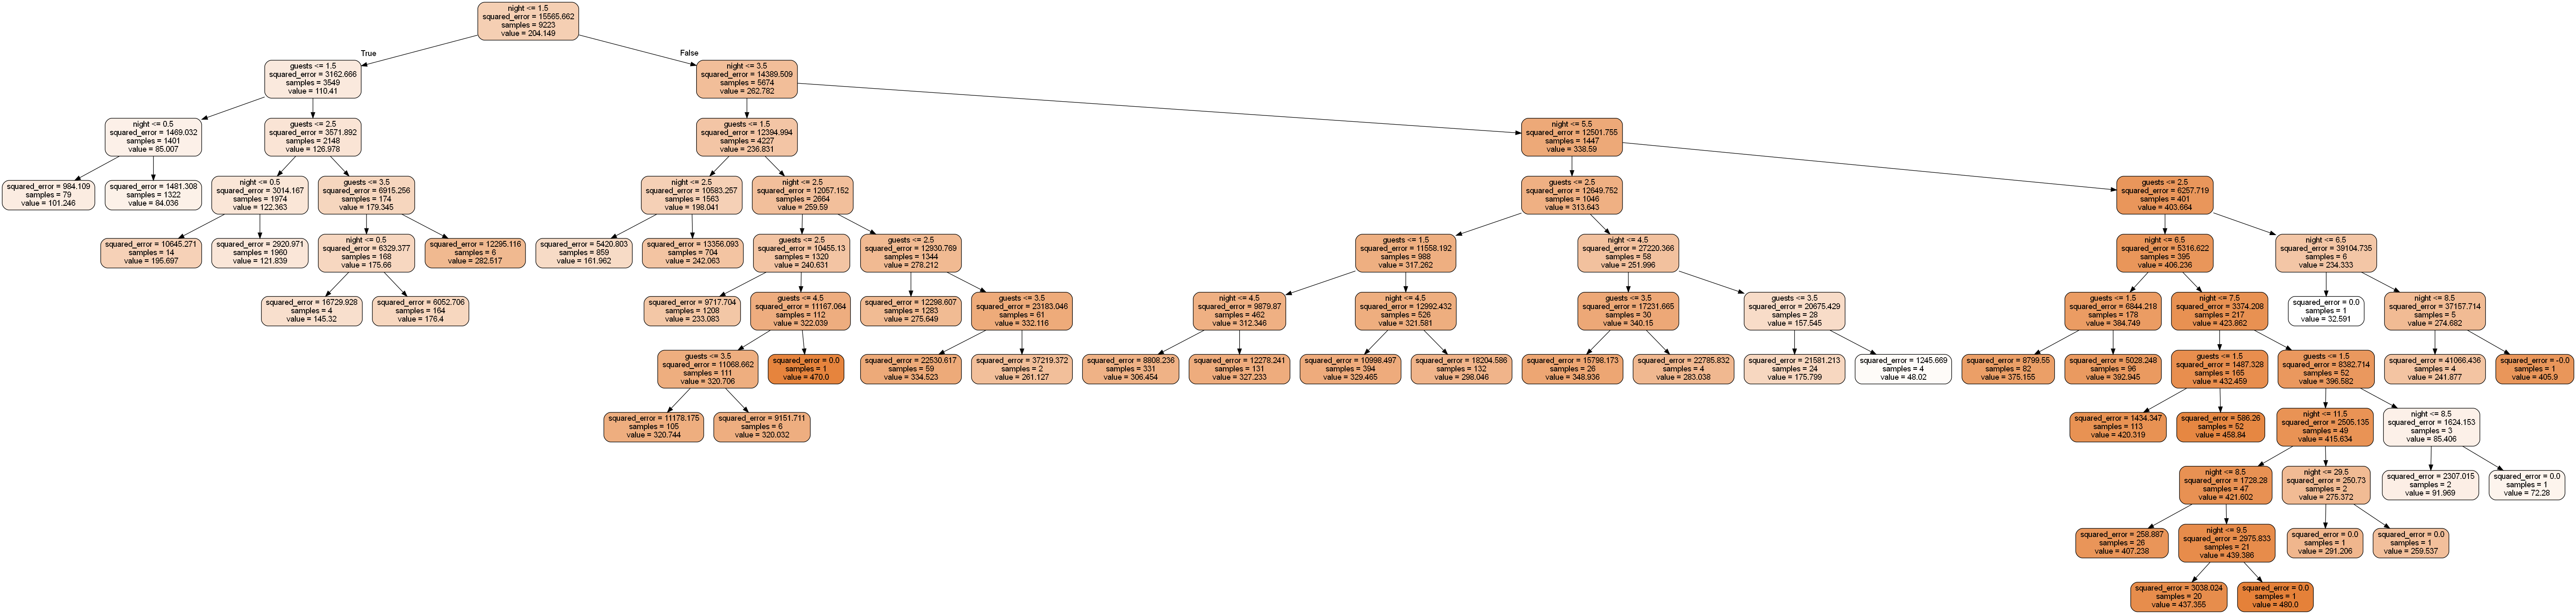

In [42]:
from IPython.display import Image  
# from sklearn.externals.six import StringIO
from io import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(['night','guests'])
features

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
# export_graphviz(dt,out_file ='tree.dot')
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Karar agaci modelinin tahmin hatalarinin histogrami.
Normal dagilim gostermektedir.

(array([   9.,   69.,   65.,  547., 1890., 1131.,  550.,  240.,   38.,
           5.]),
 array([-381.57974774, -305.64977197, -229.71979619, -153.78982042,
         -77.85984464,   -1.92986887,   74.0001069 ,  149.93008268,
         225.86005845,  301.79003423,  377.72001   ]),
 <BarContainer object of 10 artists>)

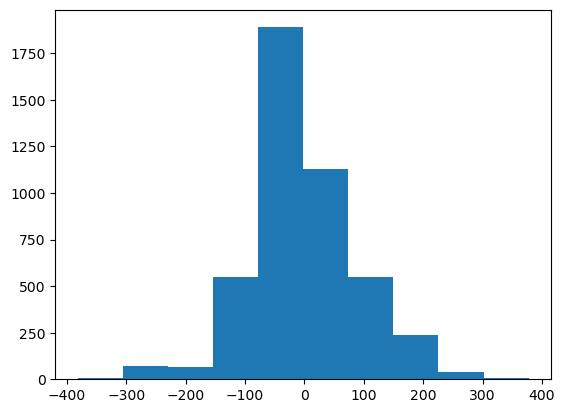

In [72]:
plt.hist(y_test-pred)

Kategorik verilerin yapay zeka modeline dahil edilebilmesi icin sayisallastirilmasi.
(Gun ve aylar icin 0 ve 1 ile kodlama yapiliyor.)

In [49]:
day = pd.get_dummies(hotel['booking_day'],drop_first=True)
months = pd.get_dummies(hotel['booking_month'], drop_first=True)
hotello = pd.concat([hotel,day,months], axis=1)
rooms = pd.get_dummies(hotel['room_type'], drop_first=True)
hotello.drop(['booking_date','arrival_date','departure_date','reference_source','booking_year', 'booking_year_month','booking_day'],axis=1,inplace=True)
hotello.drop('room_type',axis=1, inplace=True)

X = hotello.drop('total_amount',axis=1)
y = hotello['total_amount']

X = X.drop('booking_month',axis=1)
X.columns = X.columns.astype(str)
X.head()

,night,guests,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,6,7,8,9,10,11,12
0,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
5,1,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
6,2,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


Karar agacinin yeni veri tipleri ile egitilmesi.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dt.fit(X_train,y_train)
pred = dt.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

72.24149241958192


Bir onceki karar agaci modeline gore hata orani dusuyor.
Ucretlendirmeye ay ve gun degerlerinin etkisini gozlemleyebiliyoruz.

(array([  10.,   20.,   45.,  133., 1453., 2404.,  352.,   98.,   20.,
           9.]),
 array([-449.39663682, -362.57538895, -275.75414108, -188.93289321,
        -102.11164535,  -15.29039748,   71.53085039,  158.35209826,
         245.17334613,  331.99459399,  418.81584186]),
 <BarContainer object of 10 artists>)

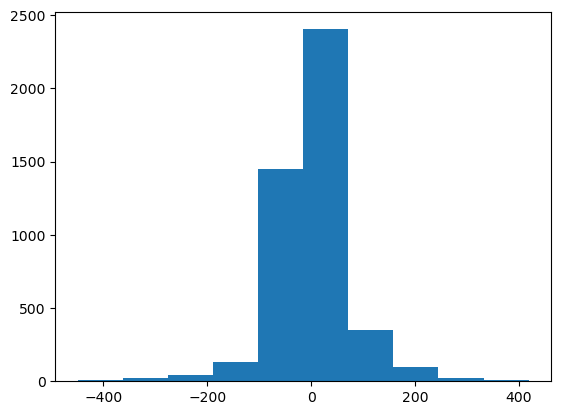

In [52]:
plt.hist(y_test-pred)

Linear Regresyon Modeli. Modelin sonunda elde edilen kok ortalama kare hatasinin azaltilmasi hedeflenecektir.  

In [53]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
new_pred = lm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,new_pred)))

88.23046680176523


Modelde kullanilan faktorler. (Kalinan gece sayisi, misafir sayisi, gun ve ay)

In [54]:
X_train.columns

Index(['night', 'guests', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '2', '3', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object')

Ihtiyac duyulan ek bilgiler:
    
    Rakip otellere ait fiyat bilgisi: 
    Modellerin sadece otele ait bilgiler uzerinden gelecege yonelik tahminler uretmesini engelleyerek, cevre otellerin fiyat politiklarinin da modele dahil edilmesini saglayacaktir. Elde edilen kazancin maksimize edilmesinde rakip otellerin fiyat politikalari onem kazanmaktadir. 

Eklenmesi planlanan diger veriler:

    Otel Musteri Degerlendirmeleri: 
    Ucuncu taraf uygulamalara ait API kullanilarak, otellere ait verilerin toplanmasi hedeflenecektir. Elde edilen yorum bilgileri uzerinde 'Dogal Dil Isleme(NLP)' teknikleri kullanilarak, yorumlarda yer alan anlamlarin model tarafindan ogrenilmesi hedeflenecek, olumlu/olumsuz yorum betikleri model tarafindan anlasilacak, yorumlarin hangi dilde yapildiginin onemi ortadan kaldirilacaktir. Elde edilen parse edilmis betiklerin sayisallastirilmasi sonrasinda modele ek bilgi olarak verilmesi saglanacaktir.  
    
    Modele veri kaynagi olarak kullanilan featurelarin artirilmasi:
    Var olan verilerdeki featurelarin iliskileri incelenerek modele anlamli veri saglanmasinin denenmesi. Ornegin: booking date ve arrival date a ait tarih bilgileri, haftanin hangi gunu oldugu bilgisi, ayin kacinci haftasi oldugu bilgisi verilmesine ragmen, iki tarih arasindaki farkin model tarafinden kendiliginden ogrenmesi beklenmektedir. Iki tarih arasindaki farkin modele saglanmasi ve modelde yarattigi degisikligin incelenmesi. Bu tur verilerin eklenmesi ile model basarisinin artirilmasinin hedeflenmesi. 

    Rakip otel verisinin mevcut otele benzer nitelik tasimasi durumunda modele saglanmasi:
    Secili bolgedeki tum otellere ait verilerin modele saglanmasi yerine, mevcut otel ile benzer nitelikleri tasiyan otellere ait verilerin modele saglanmasi. Soz konusu yontem ile benzer durumda bulunmayan otellere ait fiyat verisinin modele saglanmasinin onune gecilecektir. 



Incelenen Hususlar:
    1. Google Cloud Platform uzerinde bulunan Travel APIs grubunda yer alan API documentasyonlarinin detayli analizi. Ilk analiz sonucunda Google tarafindan otellerin verilerinin merkezi olarak toplanmasinin hedeflendigi, google ads ve partners gruplarinda yer almak isteyen otellerin verilerini gonderdigi anlasilmistir. Google Platform API uzerinden kullanilmak istenen location based APIlarin enable edilmesi ve sorgu gonderilmesi saglanmistir. 



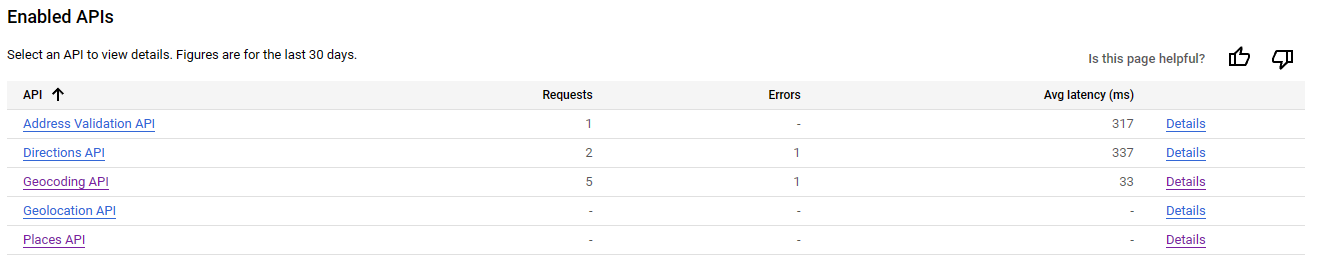

    1.a. Google tarafindan saglanan ucretsiz API kullanimi destegi uzerinden asagida yer alan geolocation verilerine erisim saglanmis, sorgu yapilmasinin mumkun oldugu gorulmustur, Geolokasyonlama metodlari modelin otel-rakip otel ikilisi mesafesini ogrenerek lokal fiyatlamayi ogrenmesi hedeflenebilecektir.

In [ ]:
import csv
import pandas as pd
import requests
from bs4 import BeautifulSoup
import googlemaps
from datetime import datetime


gmaps = googlemaps.Client(key='xxx')

# Geocoding an address
geocode_result = gmaps.geocode('1600 Amphitheatre Parkway, Mountain View, CA')

# Look up an address with reverse geocoding
reverse_geocode_result = gmaps.reverse_geocode((40.714224, -73.961452))

# Request directions via public transit
now = datetime.now()
directions_result = gmaps.directions("Sydney Town Hall",
                                     "Parramatta, NSW",
                                     mode="transit",
                                     departure_time=now)

# Validate an address with address validation
addressvalidation_result = gmaps.addressvalidation(['1600 Amphitheatre Pk'],
                                                   regionCode='US',
                                                   locality='Mountain View',
                                                   enableUspsCass=True)

Incelenen Hususlar:
    2. WebScraper denemesi: Booking.com uzerinde secilen bir alanda yer alan otellere ait fiyat verisinin bir sonraki kod bolumunde gosterildigi sekilde elde edilmesi saglanmistir. Sonuc olarak web sayfasinda yer alan HTML taglarinin parse edilmesi ile secilen tarih araliginda otellerin fiyatlandirmasi elde edilmistir. Ancak, gecmise yonelik verilerin cekilmesi denendiginde, booking.com tarafindan fiyat hanesinin bos olarak gonderildigi tespit edilmistir. 

In [ ]:
url = 'https://www.booking.com/searchresults.en-gb.html?ss=Antalya&ssne=Antalya&ssne_untouched=Antalya&highlighted_hotels=244174&hp_sbox=1&label=gen173nr-1BCAEoggI46AdIM1gEaAOIAQGYAQm4ARfIAQzYAQHoAQGIAgGoAgO4Ap6Au6QGwAIB0gIkNjJlNDVjZmEtZGUyZC00ZGM1LTg1MjAtNzU2NzBkOTgzNzE52AIF4AIB&sid=03eb0acf24145aa10209b68477f3d76b&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=hotel&dest_id=-735347&dest_type=city&checkin=2022-07-01&checkout=2022-07-05&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all the hotel elements in the HTML document
hotels = soup.findAll('div', {'data-testid': 'property-card'})

hotels_data = []
# Loop over the hotel elements and extract the desired data
for hotel in hotels:
    # Extract the hotel name
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    # Extract the hotel location
    location_element = hotel.find('span', {'data-testid': 'address'})
    location = location_element.text.strip()

    # Extract the hotel price
    price_element = hotel.find(
        'span', {'data-testid': 'price-and-discounted-price'})
    price = ''
    if price_element:
        price = price_element.text.strip()

    # Extract the hotel rating
    rating_element = hotel.find('div', {'class': 'b5cd09854e d10a6220b4'})
    rating = ''
    if rating_element:
        rating = rating_element.text.strip()

    # Append hotes_data with info about hotel
    hotels_data.append({
        'name': name,
        'location': location,
        'price': price,
        'rating': rating
    })

hotels = pd.DataFrame(hotels_data)
hotels.head()

hotels.to_csv('hotels.csv', header=True, index=False)

print('Done')